In [1]:
import sys,os,time

import tables as tb
import yaml
import numpy as np
import matplotlib.pyplot as plt
import tjmonopix.tjmonopix
import tjmonopix.scans.source_scan as source_scan
import tjmonopix.scans.th_scan as th_scan

DUtoe=20
COL=112
ROW=224

In [2]:
chip=tjmonopix.tjmonopix.TJMonoPix(
    conf="../tjmonopix/tjmonopix_mio3.yaml",
    no_power_reset=False)
chip.init("EN_PMOS")

2019-12-02 14:32:39,644 [INFO ] (MainThread) GPAC: power reset
2019-12-02 14:32:41,056 [INFO ] (MainThread) Found adapter card: General Purpose Analog Card (GPAC) with ID 8
2019-12-02 14:32:41,132 [INFO ] (MainThread) Found board 0 running firmware version 0.0
2019-12-02 14:32:41,224 [INFO ] (MainThread) ibias = 45
2019-12-02 14:32:41,225 [INFO ] (MainThread) ibias = 503.125nA
2019-12-02 14:32:41,495 [INFO ] (MainThread) {'VPC [V]': 1.3002327889999996, 'VDDA_DAC [mA]': 2.0039990762671183, 'VDDP [V]': 1.7782266489468406, 'VDDP OC': False, 'VDDA [mA]': 30.612098034535094, 'VDDD [V]': 1.7994442140000002, 'VDDA_DAC OC': False, 'VDDD [mA]': 0.5009997250796382, 'VPCSWSF [V]': 0.5005069754368446, 'VDDP [mA]': 79.29257254369725, 'BiasSF [V]': 1.058522880236842, 'VDDD OC': False, 'VPC [mA]': -0.30600120862775315, 'VPCSWSF [mA]': -0.11206062506587944, 'VDDA [V]': 1.7855088356713427, 'VDDA OC': False, 'VDDA_DAC [V]': 1.7977220453172207, 'BiasSF [mA]': 0.10088749999999999}


In [22]:
## (optional) reset configuration
chip.default_conf()
chip.write_conf()

2019-12-02 14:38:24,148 [INFO ] (MainThread) ibias = 45
2019-12-02 14:38:24,150 [INFO ] (MainThread) ibias = 503.125nA


# Electrical tests

In [23]:
####### CONFIGURE THE FRONT END ######
# INPUT baseline
chip.set_vreset_dacunits(35,1) #1V
# OUTPUT BASELINE
chip.set_icasn_dacunits(0,1) #4.375nA # approx 1.084V at -3V backbias, 600mV at 0V backbias
# INOUT RESET rate
chip.set_ireset_dacunits(2,1,1) #270pA, HIGH LEAKAGE MODE, NORMAL SCALING, 0 = LOW LEAKAGE MODE, SCALING*0.01
# OUTPUT RESET rate
chip.set_ithr_dacunits(5,1) #680pA
# BIASING OF THE DISCRIMINATOR (AND THE THRESHOLD)
chip.set_idb_dacunits(20,1) #500nA
# DC current of Amp, OUTPUT RISE TIME
chip.set_ibias_dacunits(20,1) #500nA
chip.write_conf()

2019-12-02 14:38:28,774 [INFO ] (MainThread) vreset = 0.909330708661V
2019-12-02 14:38:28,775 [INFO ] (MainThread) icasn = 0
2019-12-02 14:38:28,777 [INFO ] (MainThread) icasn = 4.375nA
2019-12-02 14:38:28,779 [INFO ] (MainThread) ireset = 60 low leakage mode
2019-12-02 14:38:28,780 [INFO ] (MainThread) ireset = 20.849609375pA, low leakage mode
2019-12-02 14:38:28,782 [INFO ] (MainThread) ithr = 15
2019-12-02 14:38:28,783 [INFO ] (MainThread) ithr = 2.1875nA
2019-12-02 14:38:28,785 [INFO ] (MainThread) idb = 15
2019-12-02 14:38:28,786 [INFO ] (MainThread) idb = 280.0nA
2019-12-02 14:38:28,788 [INFO ] (MainThread) ibias = 15
2019-12-02 14:38:28,789 [INFO ] (MainThread) ibias = 175.0nA


In [5]:
#### (optional) check analog output
chip.enable_analog()
chip.set_inj_all(inj_n=0)
chip.inject()

2019-11-29 18:00:05,424 [INFO ] (MainThread) vl = 1.00862204724V
2019-11-29 18:00:05,426 [INFO ] (MainThread) vh = 1.50468503937V


In [18]:
#### enable pixels and mask noisy pixels
chip.set_inj_all(inj_n=1)
chip.set_monoread()
chip.auto_mask()

2019-12-02 14:36:54,375 [INFO ] (MainThread) vl = 1.00862204724V
2019-12-02 14:36:54,377 [INFO ] (MainThread) vh = 1.50468503937V
2019-12-02 14:36:54,609 [INFO ] (MainThread) auto_mask th=2 step=10 exp=0.200000 fl=EN_HV
2019-12-02 14:36:55,944 [INFO ] (MainThread) Enable MASKH 10 Noise data 5354
2019-12-02 14:36:55,945 [INFO ] (MainThread) Number of noisy pixels: 6
2019-12-02 14:36:56,175 [INFO ] (MainThread) Enable MASKH 20 Noise data 9125
2019-12-02 14:36:56,177 [INFO ] (MainThread) Number of noisy pixels: 8
2019-12-02 14:36:56,402 [INFO ] (MainThread) Enable MASKH 30 Noise data 2555
2019-12-02 14:36:56,403 [INFO ] (MainThread) Number of noisy pixels: 13
2019-12-02 14:36:56,628 [INFO ] (MainThread) Enable MASKH 40 Noise data 2068
2019-12-02 14:36:56,630 [INFO ] (MainThread) Number of noisy pixels: 16
2019-12-02 14:36:56,861 [INFO ] (MainThread) Enable MASKH 50 Noise data 13870
2019-12-02 14:36:56,863 [INFO ] (MainThread) Number of noisy pixels: 22
2019-12-02 14:36:57,097 [INFO ] (Mai

2019-12-02 14:37:08,345 [INFO ] (MainThread) Number of noisy pixels: 85
2019-12-02 14:37:08,573 [INFO ] (MainThread) Enable MASKD 210 Noise data 4
2019-12-02 14:37:08,575 [INFO ] (MainThread) Number of noisy pixels: 85
2019-12-02 14:37:08,803 [INFO ] (MainThread) Enable MASKD 220 Noise data 2
2019-12-02 14:37:08,804 [INFO ] (MainThread) Number of noisy pixels: 85
2019-12-02 14:37:09,032 [INFO ] (MainThread) Enable MASKD 230 Noise data 4
2019-12-02 14:37:09,034 [INFO ] (MainThread) Number of noisy pixels: 86
2019-12-02 14:37:09,262 [INFO ] (MainThread) Enable MASKD 240 Noise data 3
2019-12-02 14:37:09,263 [INFO ] (MainThread) Number of noisy pixels: 87
2019-12-02 14:37:09,491 [INFO ] (MainThread) Enable MASKD 250 Noise data 3
2019-12-02 14:37:09,493 [INFO ] (MainThread) Number of noisy pixels: 87
2019-12-02 14:37:09,720 [INFO ] (MainThread) Enable MASKD 260 Noise data 2
2019-12-02 14:37:09,722 [INFO ] (MainThread) Number of noisy pixels: 87
2019-12-02 14:37:09,948 [INFO ] (MainThread) E

array([(3,   0,   5), (3,   0,  54), (3,   0,  67), (3,   1,  25),
       (3,   3,  18), (3,   3, 207), (3,   4,  68), (3,   5, 105),
       (3,   6,  77), (3,   8, 103), (3,   8, 125), (3,   9,  36),
       (3,  12, 176), (3,  12, 177), (3,  12, 190), (3,  14,   4),
       (3,  14,  54), (3,  14, 128), (3,  15,  17), (3,  16, 138),
       (3,  17,  22), (3,  18,  21), (3,  19, 222), (3,  21,  77),
       (3,  21, 111), (3,  22,  63), (3,  22,  66), (3,  25,  93),
       (3,  26,   3), (3,  26,  47), (3,  29,  90), (3,  33,  59),
       (3,  34,  44), (3,  36,   4), (3,  37,  77), (3,  38, 189),
       (3,  40,  60), (3,  41, 115), (3,  44, 155), (3,  44, 180),
       (3,  46, 215), (3,  49,  37), (3,  49,  55), (3,  50,   4),
       (3,  50,  53), (3,  55,  56), (3,  57,  28), (3,  57, 109),
       (3,  61,  43), (3,  63,  68), (3,  65, 214), (3,  66,  89),
       (3,  67, 182), (3,  68, 191), (3,  69, 101), (3,  70,   4),
       (3,  71,  23), (3,  71,  40), (3,  74, 119), (3,  74, 1

In [11]:
### check power status (VDDD < several mA, VDDP roughly 80mA)
chip.get_power_status()

{'BiasSF [V]': 1.0635227215526315,
 'BiasSF [mA]': 0.10038269679999999,
 'VDDA OC': False,
 'VDDA [V]': 1.7945024418837676,
 'VDDA [mA]': 13.265242527115744,
 'VDDA_DAC OC': False,
 'VDDA_DAC [V]': 1.7977220453172207,
 'VDDA_DAC [mA]': 2.0039990762671183,
 'VDDD OC': False,
 'VDDD [V]': 1.7994442140000002,
 'VDDD [mA]': 0.5009997250796382,
 'VDDP OC': False,
 'VDDP [V]': 1.7782266489468406,
 'VDDP [mA]': 79.29257254369725,
 'VPC [V]': 1.3002327889999996,
 'VPC [mA]': 0.09600039464051395,
 'VPCSWSF [V]': 0.5005069754368446,
 'VPCSWSF [mA]': 0.033165939617373685}

preamp True
inj True


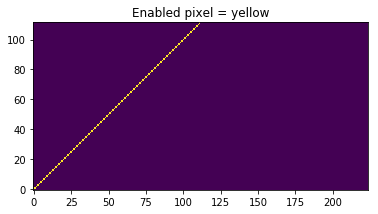

In [24]:
### check 
### select one pixel
col=50
row=50
chip.enable_injection(chip.fl_n, col, row)
#chip.enable_pixel(chip.fl_n,col,row) 
#chip.enable_hitor(chip.fl_n,col,row)
mask=chip.get_pixel_status(mask=None,mode="all")
print "preamp of [%d,%d]:"%(col,row),
print chip.get_pixel_status(mask=mask,mode="preamp")[chip.fl_n, col, row]
print "inj of [%d,%d]:"%(col,row),
print chip.get_pixel_status(mask=mask,mode="inj")[chip.fl_n, col, row]
print "hitor of [%d,%d]:"%(col,row),
print chip.get_pixel_status(mask=mask,mode="mon")[chip.fl_n, col, row]

plt.imshow(chip.get_pixel_status(mask=mask,mode="preamp")[chip.fl_n,:,:],
           interpolation="none",origin="bottomleft")
plt.title("Enabled pixel = yellow");

In [27]:
### (optional) inject 1 pixel. it is good idea to run this once/twice.
chip.set_inj_all(inj_n=1000,inj_phase=0)
#chip.reset_ibias()
chip.set_monoread()
chip.inject()
time.sleep(1)
dat=chip.interpret_data(chip['fifo'].get_data())
print "n of data", len(dat)
if len(dat)!=0:
    uni,cnt=np.unique(dat[["col",'row']], return_counts=True)
    arg=np.argsort(cnt)
    for a in arg[::-1]:
        print uni[a],cnt[a]

2019-12-02 14:38:43,450 [INFO ] (MainThread) vl = 1.00862204724V
2019-12-02 14:38:43,452 [INFO ] (MainThread) vh = 1.50468503937V


1000
(10, 10) 1000


2019-12-02 14:38:46,011 [INFO ] (MainThread) vl = 1.00862204724V
2019-12-02 14:38:46,013 [INFO ] (MainThread) vh = 1.50468503937V
2019-12-02 14:38:46,017 [INFO ] (MainThread) Initializing ThScan
2019-12-02 14:38:46,294 [INFO ] (MainThread) Power status: {'VPC [V]': 1.3002327889999996, 'VDDA_DAC [mA]': 2.0039990762671183, 'VDDP [V]': 1.7782266489468406, 'VDDP OC': False, 'VDDA [mA]': 13.265242527115744, 'VDDD [V]': 1.8014440960000002, 'VDDA_DAC OC': False, 'VDDD [mA]': 7.585704998729309e-08, 'VPCSWSF [V]': 0.5000079, 'VDDP [mA]': 79.29257254369725, 'BiasSF [V]': 1.0645226898157893, 'VDDD OC': False, 'VPC [mA]': -0.062000235499750256, 'VPCSWSF [mA]': 0.13668383693484826, 'VDDA [V]': 1.7945024418837676, 'VDDA OC': False, 'VDDA_DAC [V]': 1.7977220453172207, 'BiasSF [mA]': 0.10038269679999999}
2019-12-02 14:38:46,492 [INFO ] (MainThread) Temperature: 30.2 C
2019-12-02 14:38:46,524 [INFO ] (MainThread) Creating ZMQ context
2019-12-02 14:38:46,525 [INFO ] (MainThread) Creating socket connecti

0 139226 100.000% 0.002s 46409hits 0errs
data (inj_n 1000,inj_loop 35): INJ=35000 MONO=11409 MON=0
0 46409 100.000% 0.003s 11409hits 0errs
delete_noninjected from 11409 to 11409 to 11409 100.000 percent
delete_cetainvalue from 11409 to 11409 100.000 percent
fit mu=7.625e+02(23.1054DU) sigma=2.612e+01(0.7916DU)


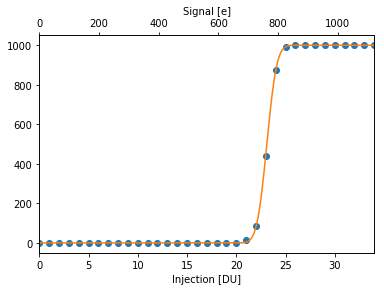

In [28]:
### S-curve
chip.set_inj_all(inj_n=1000,inj_phase=0)
reload(th_scan)
scan=th_scan.ThScan(chip)
scan.start(rowlist=np.arange(row,row+1,1), ## list of rows
           collist=np.arange(col,col+1,1), ## list of columns
           n_mask_col=1,                   ## maximum number of columns which are injected at once
           injlist=np.arange(0,35)         ## scan values of test pulse amplitude in DU
           )                               ## do not change
scan.analyze(scan.output_filename)
scan.stop()
fraw=scan.output_filename+'.h5'
fev=fraw[:-7]+'ev.h5'

with tb.open_file(fev) as f:
    cnts=f.root.Cnts[:]
    inj=f.root.ScurveFit.attrs.injlist
    fit=f.root.ScurveFit[:]
fig,ax=plt.subplots(ncols=1,nrows=1,sharey=True)
ax=[ax]
cnts=cnts[np.bitwise_and(cnts['col']==col,cnts['row']==row)]
fit=fit[np.bitwise_and(fit['col']==col,fit['row']==row)][0]
cnt=np.zeros(len(inj))
for c in cnts:
    cnt[np.argwhere(inj==c["inj"])[0][0]]=c['cnt']
x,y=tjmonopix.analysis.utils.scurve_from_fit(th=inj,n=500,
        reverse=False,A_fit=fit["A"],mu_fit=fit["mu"],sigma_fit=fit['sigma'])
ax[0].plot(inj,cnt,"o")
ax[0].plot(x,y,"-")
ax2=ax[0].twiny()
ax[0].set_xbound(np.min(inj),np.max(inj))
ax2.set_xbound(np.min(inj)*DUtoe,np.max(inj)*DUtoe)
ax[0].set_xlabel("Injection [DU]")
ax2.set_xlabel("Signal [e]")
print "fit mu=%.3e(%.4fDU)"%(fit["mu"]*DUtoe,fit["mu"]),
print "sigma=%.3e(%.4fDU)"%(fit["sigma"]*DUtoe,fit["sigma"])

In [15]:
## Threshold scan 1col=~1.5min
chip.set_inj_all(inj_n=100,inj_phase=0)
reload(th_scan)
scan=th_scan.ThScan(chip)
scan.start(rowlist=np.arange(0,224,1), ## list of rows
           collist=np.arange(0,112,10), ## list of columns change here (0,112,1) for full scan
           n_mask_col=1,                   ## max number of columns to be injected
           injlist=np.arange(0,35),        ## scan values of test pulse amplitude in DU
           debug=4)                        
scan.analyze(scan.output_filename)
scan.stop()
fraw=scan.output_filename+'.h5'
fev=fraw[:-7]+'ev.h5'

2019-11-29 18:04:15,634 [INFO ] (MainThread) vl = 1.00862204724V
2019-11-29 18:04:15,636 [INFO ] (MainThread) vh = 1.50468503937V
2019-11-29 18:04:15,640 [INFO ] (MainThread) Initializing ThScan
2019-11-29 18:04:15,911 [INFO ] (MainThread) Power status: {'VPC [V]': 1.3002327889999996, 'VDDA_DAC [mA]': 2.0039990762671183, 'VDDP [V]': 1.7772265476429288, 'VDDP OC': False, 'VDDA [mA]': 13.7754441596869, 'VDDD [V]': 1.800444155, 'VDDA_DAC OC': False, 'VDDD [mA]': 7.585704998729309e-08, 'VPCSWSF [V]': 0.5005069754368446, 'VDDP [mA]': 88.38344072402552, 'BiasSF [V]': 1.0650226739473683, 'VDDD OC': False, 'VPC [mA]': -0.1580006183697842, 'VPCSWSF [mA]': 0.04623130529821999, 'VDDA [V]': 1.7935031523046094, 'VDDA OC': False, 'VDDA_DAC [V]': 1.7977220453172207, 'BiasSF [mA]': 0.10088749999999999}
2019-11-29 18:04:16,112 [INFO ] (MainThread) Temperature: 30.2 C
2019-11-29 18:04:16,147 [INFO ] (MainThread) Creating ZMQ context
2019-11-29 18:04:16,149 [INFO ] (MainThread) Creating socket connection

0 45238535 100.000% 0.470s 15079512hits 0errs
data (inj_n 100,inj_loop 7840): INJ=6247657 MONO=3752343 MON=0


HDF5ExtError: HDF5 error back trace

  File "H5Dio.c", line 336, in H5Dwrite
    can't write data
  File "H5Dio.c", line 828, in H5D__write
    can't write data
  File "H5Dchunk.c", line 2363, in H5D__chunk_write
    unable to read raw data chunk
  File "H5Dchunk.c", line 3686, in H5D__chunk_lock
    unable to preempt chunk(s) from cache
  File "H5Dchunk.c", line 3352, in H5D__chunk_cache_prune
    unable to preempt one or more raw data cache entry
  File "H5Dchunk.c", line 3203, in H5D__chunk_cache_evict
    cannot flush indexed storage buffer
  File "H5Dchunk.c", line 3123, in H5D__chunk_flush_entry
    unable to write raw data to file
  File "H5Fio.c", line 165, in H5F_block_write
    write through page buffer failed
  File "H5PB.c", line 1028, in H5PB_write
    write through metadata accumulator failed
  File "H5Faccum.c", line 826, in H5F__accum_write
    file write failed
  File "H5FDint.c", line 258, in H5FD_write
    driver write request failed
  File "H5FDsec2.c", line 811, in H5FD_sec2_write
    file write failed: time = Fri Nov 29 18:15:59 2019
, filename = '/home/user/workspace/tjmonopix/tjmonopix_30/examples/output_data/20191129_180415_th_ev.h5', file descriptor = 4, errno = 28, error message = 'No space left on device', buf = 0x556958dfd432, total write size = 63759, bytes this sub-write = 63759, bytes actually written = 18446744073709551615, offset = 133582848

End of HDF5 error back trace

Problems appending the records.

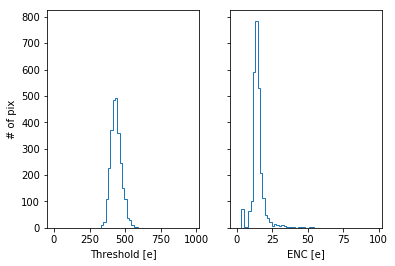

In [24]:
# threshold, noise distribution
with tb.open_file(fev) as f:
    fit=f.root.ScurveFit[:]
fig,ax=plt.subplots(ncols=2,nrows=1,sharey=True)
ax[0].hist(fit['mu']*DUtoe,bins=np.arange(0,30,0.5)*DUtoe,histtype="step")
ax[1].hist(fit['sigma']*DUtoe,bins=np.arange(0,3,0.05)*DUtoe,histtype="step")
ax[0].set_ylabel("# of pix")
ax[0].set_xlabel("Threshold [e]")
ax[1].set_xlabel("ENC [e]");

2019-11-29 18:37:43,188 [INFO ] (MainThread) Initializing SourceScan
2019-11-29 18:37:43,501 [INFO ] (MainThread) Power status: {'VPC [V]': 1.3002327889999996, 'VDDA_DAC [mA]': 2.0039990762671183, 'VDDP [V]': 1.7772265476429288, 'VDDP OC': False, 'VDDA [mA]': 13.7754441596869, 'VDDD [V]': 1.800444155, 'VDDA_DAC OC': False, 'VDDD [mA]': 7.585704998729309e-08, 'VPCSWSF [V]': 0.5005069754368446, 'VDDP [mA]': 88.38344072402552, 'BiasSF [V]': 1.0665226263421053, 'VDDD OC': False, 'VPC [mA]': -0.3620014319686063, 'VPCSWSF [mA]': -0.16733717217715224, 'VDDA [V]': 1.7935031523046094, 'VDDA OC': False, 'VDDA_DAC [V]': 1.7977220453172207, 'BiasSF [mA]': 0.10088749999999999}
2019-11-29 18:37:43,692 [INFO ] (MainThread) Temperature: 31.1 C
2019-11-29 18:37:43,720 [INFO ] (MainThread) Creating ZMQ context
2019-11-29 18:37:43,721 [INFO ] (MainThread) Creating socket connection to server tcp://127.0.0.1:5500
2019-11-29 18:37:43,724 [INFO ] (MainThread) ScanBase.start:data_send.data_send_init connecte

/home/user/workspace/tjmonopix/tjmonopix_30/examples/output_data/20191129_183743_source_scan.h5
0 1076 100.000% 1.253s 359hits


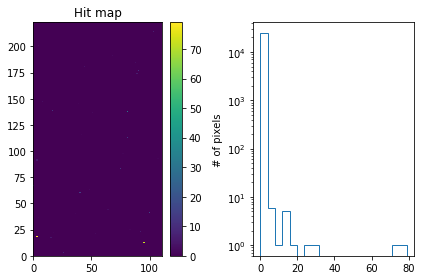

In [25]:
## noise occupancy
reload(source_scan)
scan=source_scan.SourceScan(dut=chip)
scan.start(scan_time=100,                               
           with_mon=False,with_rx1=False,with_tlu=False)
fhit=scan.analyze(scan.output_filename,event_build="none",clusterize=False)
scan.stop()
with tb.open_file(fhit) as f:
    hits=f.root.Hits[:]
fig,ax=plt.subplots(ncols=2,nrows=1)
hist=ax[0].hist2d(hits['col'],hits['row'],bins=[np.arange(0,112),np.arange(0,224)]);
fig.colorbar(hist[3],ax=ax[0])
ax[1].hist(np.reshape(hist[0],[-1]),histtype="step",bins=20)
ax[1].set_yscale("log")
ax[0].set_title("Hit map");
ax[1].set_ylabel("# of pixels");
fig.tight_layout()

# Source scan

In [88]:
### Fe
scan=source_scan.SourceScan(dut=chip)
scan.start(with_mon=False,with_rx1=False,with_tlu=False) ## do not change
fcl=scan.analyze(scan.output_filename,event_build="token",clusterize=True)
scan.stop()
fhit=scan.output_filename[:-4]+'hit.h5'

2019-11-29 19:51:19,072 [INFO ] (MainThread) Initializing SourceScan
2019-11-29 19:51:19,349 [INFO ] (MainThread) Power status: {'VPC [V]': 1.3007325834999997, 'VDDA_DAC [mA]': 2.0039990762671183, 'VDDP [V]': 1.8772366780341023, 'VDDP OC': False, 'VDDA [mA]': 13.7754441596869, 'VDDD [V]': 1.9004382550000003, 'VDDA_DAC OC': False, 'VDDD [mA]': 0.5009997250796382, 'VPCSWSF [V]': 0.5005069754368446, 'VDDP [mA]': 89.39353718850643, 'BiasSF [V]': 1.0670226104736842, 'VDDD OC': False, 'VPC [mA]': -0.20350079983422736, 'VPCSWSF [mA]': -0.015577924653475973, 'VDDA [V]': 1.7945024418837676, 'VDDA OC': False, 'VDDA_DAC [V]': 1.7977220453172207, 'BiasSF [mA]': 0.10038269679999999}
2019-11-29 19:51:19,546 [INFO ] (MainThread) Temperature: 31.4 C
2019-11-29 19:51:19,574 [INFO ] (MainThread) Creating ZMQ context
2019-11-29 19:51:19,576 [INFO ] (MainThread) Creating socket connection to server tcp://127.0.0.1:5500
2019-11-29 19:51:19,578 [INFO ] (MainThread) ScanBase.start:data_send.data_send_init co

/home/user/workspace/tjmonopix/tjmonopix_30/examples/output_data/20191129_195119_source_scan.h5
0 72107 100.000% 0.001s 24036hits
event_builder_token.build_h5() fin: /home/user/workspace/tjmonopix/tjmonopix_30/examples/output_data/20191129_195119_source_hit.h5
event_builder.build_h5() # of data:total=24036 ERR=0 TLU=0 TS1=0 TS2=0 TS3=0 TJ=24036
without flg1=24035
event_builder.build_h5() check timestamp: increase only True
event_builder.build_h5() check flg: no strange value
event_builder.build_h5() 0.001s te_offset=54
event_builder.build_h5() calculation done 0.005s
event_builder.build_h5() 0.008s DONE
clusterize_h5() 0.01s # of clusters 24035
clusterize_h5() 0.01s cluster_hits 100.00% saved
clusterize_h5() 0.01s clusters 100.00% saved
clusterize_h5() 0.01s DONE


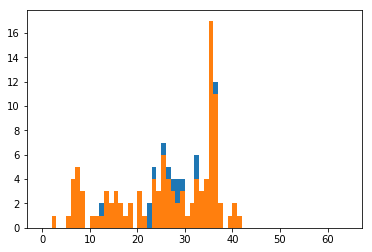

In [104]:
with tb.open_file(fcl) as f:
    dat=f.root.Clusters[:]
tmp=dat[np.bitwise_and(dat['seed_column']==col,dat['seed_row']==row)]
bins=np.arange(0,0x41)
plt.hist(tmp['charge'],bins=bins);
plt.hist(tmp['charge'][tmp['n_hits']==1],bins=bins);

In [15]:
### Sr with TLU
## tlu
## % pytlu -ie CH0 -io CH0 -th 30 -t 0 --timeout 0 -b 15 
reload(source_scan)
scan=source_scan.SourceScan(dut=chip)
scan.start(scan_time=100,
    with_mon=False,with_rx1=False,with_tlu=True) ## do not change
fcl=scan.analyze(scan.output_filename,event_build="token",clusterize=True)
scan.stop()
fhit=scan.output_filename[:-4]+'hit.h5'

2019-12-02 14:21:11,978 [INFO ] (MainThread) Initializing SourceScan
2019-12-02 14:21:12,248 [INFO ] (MainThread) Power status: {'VPC [V]': 1.3007325834999997, 'VDDA_DAC [mA]': 2.0039990762671183, 'VDDP [V]': 1.7782266489468406, 'VDDP OC': False, 'VDDA [mA]': 13.7754441596869, 'VDDD [V]': 1.8014440960000002, 'VDDA_DAC OC': False, 'VDDD [mA]': 0.5009997250796382, 'VPCSWSF [V]': 0.5005069754368446, 'VDDP [mA]': 88.38344072402552, 'BiasSF [V]': 1.0670226104736842, 'VDDD OC': False, 'VPC [mA]': -0.05150019362334029, 'VPCSWSF [mA]': 0.23216150921795584, 'VDDA [V]': 1.7945024418837676, 'VDDA OC': False, 'VDDA_DAC [V]': 1.7977220453172207, 'BiasSF [mA]': 0.10088749999999999}
2019-12-02 14:21:17,571 [INFO ] (MainThread) Temperature: 31.0 C
2019-12-02 14:21:17,600 [INFO ] (MainThread) Creating ZMQ context
2019-12-02 14:21:17,602 [INFO ] (MainThread) Creating socket connection to server tcp://127.0.0.1:5500
2019-12-02 14:21:17,604 [INFO ] (MainThread) ScanBase.start:data_send.data_send_init conn

/home/user/workspace/tjmonopix/tjmonopix_30/examples/output_data/20191202_142111_source_scan.h5


/home/user/anaconda/envs/ngap/lib/python2.7/site-packages/numba/dataflow.py:390: RuntimeWarning: Python2 style print partially supported.  Please use Python3 style print.
  "Python3 style print.", RuntimeWarning)


('ERR TJMONO2', 0, 0, 587202609)

0 2283439 100.000% 1.337s 764173hits
event_builder_token.build_h5() fin: /home/user/workspace/tjmonopix/tjmonopix_30/examples/output_data/20191202_142111_source_hit.h5
event_builder.build_h5() # of data:total=764173 ERR=0 TLU=4540 TS1=0 TS2=0 TS3=4551 TJ=755082
without flg1=747237
event_builder.build_h5() check timestamp: increase only True
event_builder.build_h5() check flg: no strange value
event_builder.build_h5() 0.025s te_offset=54
event_builder.build_h5() calculation done 0.719s
event_builder.build_h5() 0.736s DONE
clusterize_h5() 1.92s # of clusters 747237
clusterize_h5() 1.94s cluster_hits 100.00% saved
clusterize_h5() 1.97s clusters 100.00% saved
clusterize_h5() 1.97s DONE
